# HTTP Request/Response Cycle - Codealong

##  Introduction
When developing a Web application, as we saw in the previous lesson, the request/response cycle is a useful guide to see how all the components of the app fit together. The request/response cycle traces how a user's request flows through the app. Understanding the request/response cycle is helpful to figure out which files to edit when developing an app (and where to look when things aren't working). This lesson will show how this setup works using python. 



## The `requests` Library in Python

Dealing with HTTP requests could be a challenging task  any programming language. Python with two built-in modules, `urllib` and `urllib2` to handle these requests but these could be very confusing  and the documentation is not clear. This requires the programmer to write a lot of code to make even a simple HTTP request.

To make these things simpler, one easy-to-use third-party library, known as` Requests`, is available and most developers prefer to use it instead or urllib/urllib2. It is an Apache2 licensed HTTP library powered by urllib3 and httplib. Requests is add-on library that allows you to send HTTP requests using Python. With this library, you can access content like web page headers, form data, files, and parameters via simple Python commands. It also allows you to access the response data in a simple way.

![](images/logo.png)

Below is how you would install and import the requests library before making any requests. 
#### !pip install requests


In [2]:
import requests

## The `.get()` Method

Now we have requests library ready in our working environment, we can start making some requests using the `.get()` method as shown below:


In [3]:
resp = requests.get('https://matplotlib.org/')


## Status Codes
The request we make may not be always successful. The best way is to check the status code which gets returned with the response. Here is how you would do this. 


In [4]:
resp.status_code == requests.codes.ok

True


## Response Contents
Once we know that our request was successful and we have a valid response, we can check the returned information using `.text` property of the response object. 
```python
print (resp.text)
```

In [5]:
print (resp.text)

<!-- from pydata-sphinx-theme to simplify for landing page -->
<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8" />
<meta name="viewport" content="width=device-width, initial-scale=1.0" /><meta name="viewport" content="width=device-width, initial-scale=1" />
<title>Matplotlib &#8212; Visualization with Python</title>
<script data-cfasync="false">
    document.documentElement.dataset.mode = localStorage.getItem("mode") || "";
    document.documentElement.dataset.theme = localStorage.getItem("theme") || "light";
  </script>

<link href="_static/styles/theme.css?digest=e353d410970836974a52" rel="stylesheet" />
<link href="_static/styles/bootstrap.css?digest=e353d410970836974a52" rel="stylesheet" />
<link href="_static/styles/pydata-sphinx-theme.css?digest=e353d410970836974a52" rel="stylesheet" />
<link href="_static/vendor/fontawesome/6.1.2/css/all.min.css?digest=e353d410970836974a52" rel="stylesheet" />
<link rel="preload" as="font" type="font/woff2" crossorigin href="_static

So this returns a lot of information which by default is not really human-understandable due to data encoding, HTML tags and other styling information that only a web browser can truly translate. We can use **_Regular Expressions_**  to clean this information and extract the required bits and pieces for analysis. 

## Response Headers
The response of an HTTP request can contain many headers that holds different bits of information. We can use `.header` property of the response object to access the header information as shown below:


In [6]:
dict(resp.headers)

{'Date': 'Wed, 16 Aug 2023 06:49:50 GMT',
 'Content-Type': 'text/html; charset=utf-8',
 'Transfer-Encoding': 'chunked',
 'Connection': 'keep-alive',
 'last-modified': 'Mon, 05 Jun 2023 22:22:57 GMT',
 'CF-Cache-Status': 'DYNAMIC',
 'Report-To': '{"endpoints":[{"url":"https:\\/\\/a.nel.cloudflare.com\\/report\\/v3?s=xktTjkXIqVWdZsXIZ58gAo0bcQnJihCO2Rcfb5fKFcgg0QsCn7jbcNWZeczFZAkrOOR44OuilxiSXIZC7c%2F%2FDYojTi%2FbnbGzdujTeL00eqYdWm7T3s4ooBJRZRmIaL%2Bd"}],"group":"cf-nel","max_age":604800}',
 'NEL': '{"success_fraction":0,"report_to":"cf-nel","max_age":604800}',
 'Server': 'cloudflare',
 'CF-RAY': '7f77bd572d2a1b5a-NBO',
 'Content-Encoding': 'gzip'}

The content of the headers is our required element. You can see the key-value pairs holding various pieces of  information about the resource and request. Let's try to parse some of these values using the requests library:


In [8]:
print(resp.headers['Date'])
print(resp.headers['Server'])

Wed, 16 Aug 2023 06:49:50 GMT
cloudflare


## httpbin
`httpbin.org` is a popular website to test different HTTP operations and practice with request-response cycles. Let's use httpbin/get to analyze the response to a GET request. First of all, let's find out the response header and inspect how it looks. 


In [11]:
r = requests.get('http://httpbin.org/get')

response = r.json()  
print(r.json())  
print(response['args'])  
print(response['headers'])  
print(response['headers']['Accept'])  
print(response['headers']['Accept-Encoding'])  
print(response['headers']['Host'])  
print(response['headers']['User-Agent'])  
print(response['origin'])  
print(response['url'])  

{'args': {}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.26.0', 'X-Amzn-Trace-Id': 'Root=1-64dc7398-66134ab67bf4211416a6d904'}, 'origin': '105.160.115.102', 'url': 'http://httpbin.org/get'}
{}
{'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.26.0', 'X-Amzn-Trace-Id': 'Root=1-64dc7398-66134ab67bf4211416a6d904'}
*/*
gzip, deflate
httpbin.org
python-requests/2.26.0
105.160.115.102
http://httpbin.org/get


Let's use `requests` object structure to parse the values of headers as we did above. 

In [12]:
print(r.headers['Access-Control-Allow-Credentials'])  
print(r.headers['Access-Control-Allow-Origin'])  
print(r.headers['CONNECTION'])  
print(r.headers['content-length'])  
print(r.headers['Content-Type'])  
print(r.headers['Date'])  
print(r.headers['server'])  

true
*
keep-alive
308
application/json
Wed, 16 Aug 2023 06:58:35 GMT
gunicorn/19.9.0


## Passing Parameters in GET
In some cases, you'll need to pass parameters along with your GET requests. These extra parameters usually take the the form of query strings added to the requested URL. To do this, we need to pass these values in the `params` parameter. Let's try to access information from `httpbin` with some user information. 

Note: The user information is not getting authenticated at `httpbin` so any name/password will work fine. This is merely for practice. 

In [13]:
credentials = {'user_name': 'FlatironSchool', 'password': 'learnlovecode'}  
r = requests.get('http://httpbin.org/get', params=credentials)

print(r.url)  
print(r.text)  


http://httpbin.org/get?user_name=FlatironSchool&password=learnlovecode
{
  "args": {
    "password": "learnlovecode", 
    "user_name": "FlatironSchool"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.26.0", 
    "X-Amzn-Trace-Id": "Root=1-64dc73fd-3036b1bf09e6ab1314a7f9f4"
  }, 
  "origin": "105.160.115.102", 
  "url": "http://httpbin.org/get?user_name=FlatironSchool&password=learnlovecode"
}



## HTTP POST method 

Sometimes we need to send one or more files simultaneously to the server. For example, if a user is submitting a form and the form includes different fields for uploading files, like user profile picture, user resume, etc. Requests can handle multiple files on a single request. This can be achieved by putting the files to a list of tuples in the form (`field_name, file_info)`.

{
  "args": {}, 
  "data": "", 
  "files": {
    "image": ""
  }, 
  "form": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "40791", 
    "Content-Type": "multipart/form-data; boundary=bf6c9d4ade810741e51dd071a70d11fe", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.26.0", 
    "X-Amzn-Trace-Id": "Root=1-64dc7451-6e8386060c8d6bbd702e0963"
  }, 
  "json": null, 
  "origin": "105.160.115.102", 
  "url": "http://httpbin.org/post"
}


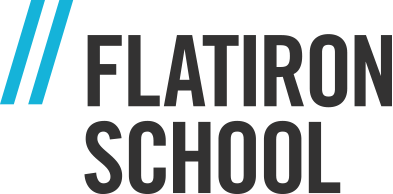

In [14]:
import requests

url = 'http://httpbin.org/post'  
file_list = [  
    ('image', ('fi.png', open('images/fi.png', 'rb'), 'image/png')),
    ('image', ('fi2.jpeg', open('images/fi2.jpeg', 'rb'), 'image/jpeg'))
]

r = requests.post(url, files=file_list)  
print(r.text)  